In [1]:
!git clone https://github.com/ultralytics/yolov5.git


Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 15814 (delta 10), reused 25 (delta 2), pack-reused 15768
Receiving objects: 100% (15814/15814), 14.64 MiB | 27.76 MiB/s, done.
Resolving deltas: 100% (10819/10819), done.


In [ ]:
cd yolov5

/content/yolov5


In [2]:
!sudo apt-get install tensorrt
!pip install -r requirements.txt
!pip install pycuda==2021.1
!pip install tensorrt==8.6.0
!sudo apt install python3-seaborn


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cuda-cccl-12-1 cuda-cccl-12-2 cuda-cudart-12-1 cuda-cudart-12-2
  cuda-cudart-dev-12-1 cuda-cudart-dev-12-2 cuda-driver-dev-12-1
  cuda-driver-dev-12-2 cuda-nvcc-12-1 cuda-toolkit-12-1-config-common
  cuda-toolkit-12-2-config-common cuda-toolkit-12-config-common libcublas-12-2
  libcublas-dev-12-2 libnvinfer-bin libnvinfer-dev libnvinfer-dispatch-dev
  libnvinfer-dispatch8 libnvinfer-headers-dev libnvinfer-headers-plugin-dev
  libnvinfer-lean-dev libnvinfer-lean8 libnvinfer-plugin-dev
  libnvinfer-plugin8 libnvinfer-samples libnvinfer-vc-plugin-dev
  libnvinfer-vc-plugin8 libnvinfer8 libnvonnxparsers-dev libnvonnxparsers8
  libnvparsers-dev libnvparsers8
The following NEW packages will be installed:
  cuda-cccl-12-1 cuda-cccl-12-2 cuda-cudart-12-1 cuda-cudart-12-2
  cuda-cudart-dev-12-1 cuda-cudart-dev-12-2 cuda-driver-dev-12-1
  cuda-dr

In [ ]:
!dpkg -l | grep TensorRT

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python benchmarks.py --weights /content/drive/MyDrive/yolov5s/yolov5s-100ep-people-counting.engine --imgsz 640 --device 0

benchmarks: weights=/content/drive/MyDrive/yolov5s/best.pt, imgsz=640, batch_size=1, data=/content/yolov5/data/coco128.yaml, device=0, half=False, test=False, pt_only=False, hard_fail=False
YOLOv5 🚀 v7.0-153-gff6a9ac Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

YOLOv5 🚀 v7.0-153-gff6a9ac Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_model summary: 395 layers, 18380054 parameters, 0 gradients
WARNING ⚠️ Benchmark failure for PyTorch: /content/drive/MyDrive/yolov5s/best.pt (1 classes) trained on different --data than what you passed (80 classes). Pass correct combination of --weights and --data that are trained together.
YOLOv5 🚀 v7.0-153-gff6a9ac Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_model summary: 395 layers, 18380054 parameters, 0 gradients

PyTorch: starting from /content/drive/MyDrive/yolov5s/best.pt with output shape (1, 100800, 6) (35.5 MB)

TorchScript: starting export with tor

In [ ]:
!python export.py --weights /content/drive/MyDrive/yolov5s/yolo-crowd-with-our-dataset.pt --include engine --device 0


export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/yolov5s/yolo-crowd-with-our-dataset.pt'], imgsz=[640, 640], batch_size=1, device=0, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['engine']
YOLOv5 🚀 v7.0-174-g5eb7f7d Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_model summary: 395 layers, 18380054 parameters, 0 gradients

PyTorch: starting from /content/drive/MyDrive/yolov5s/yolo-crowd-with-our-dataset.pt with output shape (1, 100800, 6) (35.5 MB)
requirements: Ultralytics requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 170.5 MB/s eta 0:00:00

requirements: 1 package 

In [ ]:
!/usr/src/tensorrt/bin/trtexec --onnx=/content/drive/MyDrive/yolov5s/yolov5s-faceV2-best.onnx --saveEngine=model.engine --fp16 --workspace=3000 --buildOnly --verbose
%cp ./model.engine /content/drive/MyDrive/yolov5s/

In [ ]:
!/usr/src/tensorrt/bin/trtexec --loadEngine=/content/model.engine --useCudaGraph --noDataTransfers --iterations=100 --avgRuns=100 --workspace=7000

&&&& RUNNING TensorRT.trtexec [TensorRT v8600] # /usr/src/tensorrt/bin/trtexec --loadEngine=/content/model.engine --useCudaGraph --noDataTransfers --iterations=100 --avgRuns=100 --workspace=7000
[04/24/2023-00:39:21] [W] --workspace flag has been deprecated by --memPoolSize flag.
[04/24/2023-00:39:21] [I] === Model Options ===
[04/24/2023-00:39:21] [I] Format: *
[04/24/2023-00:39:21] [I] Model: 
[04/24/2023-00:39:21] [I] Output:
[04/24/2023-00:39:21] [I] === Build Options ===
[04/24/2023-00:39:21] [I] Max batch: 1
[04/24/2023-00:39:21] [I] Memory Pools: workspace: 7000 MiB, dlaSRAM: default, dlaLocalDRAM: default, dlaGlobalDRAM: default
[04/24/2023-00:39:21] [I] minTiming: 1
[04/24/2023-00:39:21] [I] avgTiming: 8
[04/24/2023-00:39:21] [I] Precision: FP32
[04/24/2023-00:39:21] [I] LayerPrecisions: 
[04/24/2023-00:39:21] [I] Layer Device Types: 
[04/24/2023-00:39:21] [I] Calibration: 
[04/24/2023-00:39:21] [I] Refit: Disabled
[04/24/2023-00:39:21] [I] Version Compatible: Disabled
[04/24/

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 17.7 MB/s eta 0:00:00


In [14]:
!python yolov5/detect.py --source ./usmba.mp4 --weights /content/drive/MyDrive/yolov5s/yolo-crowd.engine

detect: weights=['/content/drive/MyDrive/yolov5s/yolo-crowd.engine'], source=./usmba.mp4, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/drive/MyDrive/yolov5s/yolo-crowd.engine for TensorRT inference...
[07/13/2023-16:50:47] [TRT] [I] Loaded engine size: 81 MiB
[07/13/2023-16:50:47] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +78, now: CPU 0, GPU 78 (MiB)
[07/13/2023-16:50:47] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +43,

# **Compressing the Video**

In [8]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [18]:
!ffmpeg -i /content/yolov5/runs/detect/exp7/usmba.mp4 -vcodec libx265 -crf 21 output.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [19]:
!cp /content/output.mp4 /content/drive/MyDrive/yolov5s/

# Convert Custom ONNX to TensorRT and detect using JetsonYolo code



In [ ]:
!git clone https://github.com/mailrocketsystems/JetsonYolov5.git
%cd JetsonYolov5

In [ ]:
cd JetsonYolov5

/content/JetsonYolov5


In [ ]:
%cd yolov5/
!mkdir build
%cd build
!cp ../../yolov5s.wts .
!cmake ..
!make

/content/JetsonYolov5/build
cp: cannot stat '../../yolov5s.wts': No such file or directory
CMake Warning:
  Ignoring extra path from command line:

   ".."


CMake Error: The source directory "/content/JetsonYolov5" does not appear to contain CMakeLists.txt.
Specify --help for usage, or press the help button on the CMake GUI.
make: *** No targets specified and no makefile found.  Stop.


In [ ]:
!./yolov5_det -s yolov5s.wts yolov5s.engine s

[04/19/2023-01:15:24] [W] [TRT] CUDA lazy loading is not enabled. Enabling it can significantly reduce device memory usage and speed up TensorRT initialization. See "Lazy Loading" section of CUDA documentation https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#lazy-loading
[04/19/2023-01:15:24] [W] [TRT] The implicit batch dimension mode has been deprecated. Please create the network with NetworkDefinitionCreationFlag::kEXPLICIT_BATCH flag whenever possible.
Loading weights: yolov5s.wts
[04/19/2023-01:15:26] [E] [TRT] 3: model.0.conv:kernel weights has count 0 but 3456 was expected
[04/19/2023-01:15:26] [E] [TRT] 4: model.0.conv: count of 0 weights in kernel, but kernel dimensions (6,6) with 3 input channels, 32 output channels and 1 groups were specified. Expected Weights count is 3 * 6*6 * 32 / 1 = 3456
[04/19/2023-01:15:26] [E] [TRT] 4: [convolutionNode.cpp::computeOutputExtents::58] Error Code 4: Internal Error (model.0.conv: number of kernel weights does not match te

In [ ]:
# it'll download yolov5s.onnx file if not found locally
!python convert.py --weights ../yolov5/yolov5s-people-counting.onnx --img-size 720 1280 # --nc 80

python3: can't open file '/content/JetsonYolov5/convert.py': [Errno 2] No such file or directory


In [ ]:
!python3 gen_wts.py -w best.pt -o yolov5s.wts

Invalid input file


In [ ]:
!wget https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg -O zidane.jpg

--2023-04-23 21:51:47--  https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168949 (165K) [image/jpeg]
Saving to: ‘zidane.jpg’

zidane.jpg          100%[===================>] 164.99K  --.-KB/s    in 0.003s  

2023-04-23 21:51:47 (59.3 MB/s) - ‘zidane.jpg’ saved [168949/168949]



In [ ]:
!python detect.py # --input people.mp4 # default video file

[CVU-Info] Downloading 'people.mp4' from 'https://drive.google.com/uc?id=1rioaBCzP9S31DYVh-tHplQ3cgvgoBpNJ'
Downloading...
From: https://drive.google.com/uc?id=1rioaBCzP9S31DYVh-tHplQ3cgvgoBpNJ
To: /content/Yolov5-TensorRT/people.mp4
100% 8.76M/8.76M [00:00<00:00, 213MB/s]
[CVU-INFO] Attempting to setup tensorrt for gpu device
[CVU-INFO] Using backend tensorrt-gpu
[CVU-Info] Building and Optimizing TRT-Engine for input_shape=(384, 640). This might take a few minutes for first time.
[TensorRT] INFO: [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 0, GPU 353 (MiB)
[TensorRT] INFO: Loaded engine size: 19 MB
[TensorRT] INFO: [MemUsageSnapshot] deserializeCudaEngine begin: CPU 0 MiB, GPU 353 MiB
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +206, now: CPU 0, GPU 575 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuDNN: CPU +0, GPU +172, now: CPU 0, GPU 747 (MiB)
[TensorRT] WARNING: TensorRT was linked against cuDNN 8.2.1 but loaded cuDNN 8.2.0
[TensorRT] INFO: [MemU

In [ ]:
# it will take some time to install tensorrt, build engine for first run!!!
!python detect.py --weights yolov5s.engine --input zidane.jpg --output zidane_out.jpg

[CVU-INFO] Attempting to setup tensorrt for gpu device
[CVU-INFO] Using backend tensorrt-gpu
[CVU-Info] Building and Optimizing TRT-Engine for input_shape=(384, 640). This might take a few minutes for first time.
[TensorRT] INFO: [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 0, GPU 353 (MiB)
[TensorRT] INFO: Loaded engine size: 19 MB
[TensorRT] INFO: [MemUsageSnapshot] deserializeCudaEngine begin: CPU 0 MiB, GPU 353 MiB
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +206, now: CPU 0, GPU 575 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuDNN: CPU +0, GPU +172, now: CPU 0, GPU 747 (MiB)
[TensorRT] WARNING: TensorRT was linked against cuDNN 8.2.1 but loaded cuDNN 8.2.0
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +0, now: CPU 0, GPU 729 (MiB)
[TensorRT] INFO: [MemUsageSnapshot] deserializeCudaEngine end: CPU 0 MiB, GPU 729 MiB
[TensorRT] INFO: [MemUsageSnapshot] ExecutionContext creation begin: CPU 0 MiB, GPU 729 MiB
[TensorRT] INFO: [Me

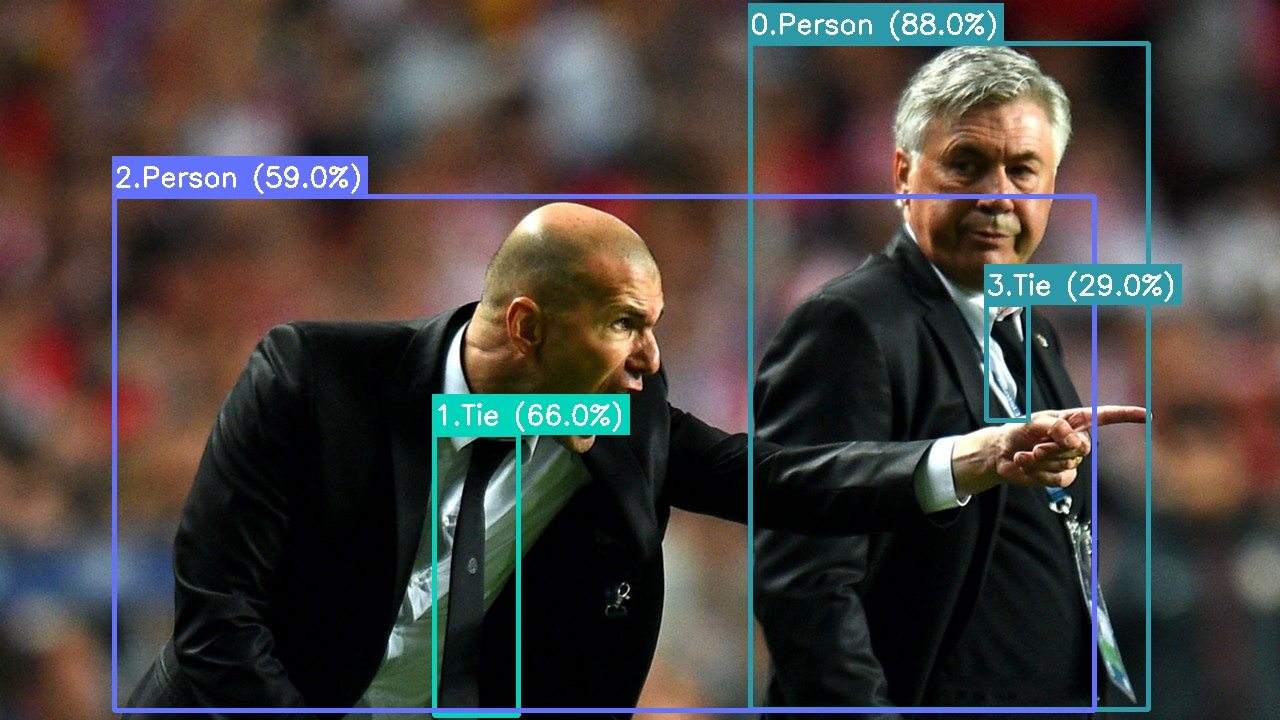

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_file = "zidane_out.jpg"
img = cv2.imread(image_file)
cv2_imshow(img)

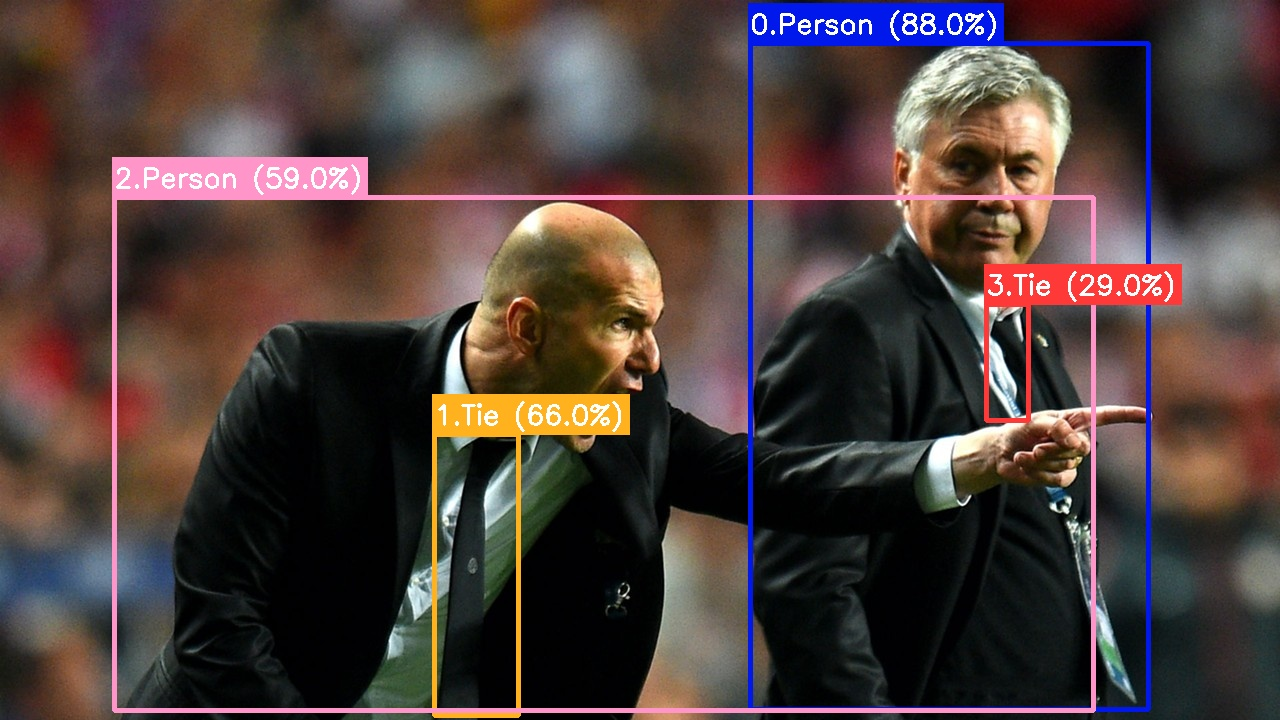

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_file = "zidane_out.jpg"
img = cv2.imread(image_file)
cv2_imshow(img)